## Dataset
Binary classification dataset with two inputs. Labels will be 0 or 1.
### Addition notes
torch.cat()
    - concatenates (joins) tensors along a specified dimension

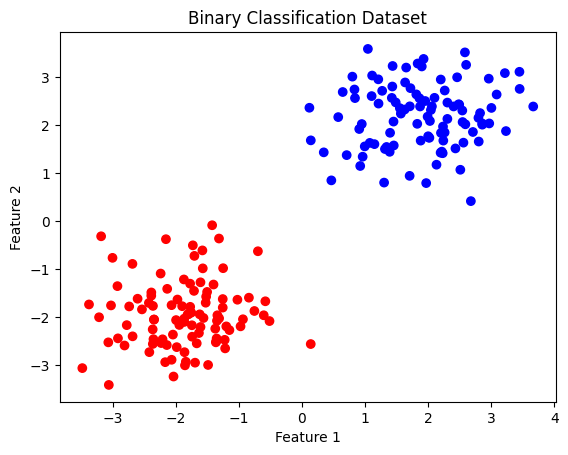

In [18]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

# generate 100 samples for class 0 and class 1
n_samples = 100
# x0: class 0 centered at (2, 2), x1: class1 centered at (-2, -2)
x0 = torch.randn(n_samples, 2) * 0.75 + torch.tensor([2.0, 2.0])
x1 = torch.randn(n_samples, 2) * 0.75 + torch.tensor([-2.0, -2.0])

# dim=0 stacks x0 and x1 vertically
X = torch.cat([x0, x1], dim=0)  # shape: (200, 2)
# 100 labels = 0 and 100 labels = 1
y = torch.cat([torch.zeros(n_samples), torch.ones(n_samples)])  # shape: (200,)

y = y.view(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='bwr')
plt.title("Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Initialize Weights and Define Forward Pass
- create weight and bias tensors for a 2 -> 4 -> 1 neural network
- define forward pass using ReLU as the hidden activation and sigmoid for the output
### Additional Notes
- requires_grad
    - when True, PyTorch tracks all operations on this tensor so it can automatically compute gradients using .backward()
- broadcasting - when two tensor have shapes that don't match, PyTorch stretches the smaller one along the mismatched dimensions as long as the sizes are compatible
    - (200, 4) + (1, 4) -> (200, 4)
        - the (1, 4) bias is broadcasted across 200 rows
    - (200, 1) + (1, 1) -> (200, 1)
        - the (1, 1) bias is broadcasted across 200 rows

In [19]:
torch.manual_seed(42)

# Layer 1: Input (2) -> Hidden (4)
W1 = torch.randn(2, 4, requires_grad=True)
b1 = torch.zeros(1, 4, requires_grad=True)

# Layer 2: Hidden (4) -> Output (1)
W2 = torch.randn(4, 1, requires_grad=True)
b2 = torch.zeros(1, 1, requires_grad=True)

def forward(X):
    z1 = X @ W1 + b1    # Linear: (200, 2) @ (2, 4) + (1, 4) -> (200, 4)
    a1 = torch.relu(z1)
    z2 = a1 @ W2 + b2   # Linear: (200, 4) @ (4, 1) + (1, 1) -> (200, 1)
    output = torch.sigmoid(z2)
    return output

## Define Loss Function and Training Loop
- use binary cross-entropy (bce) as our loss function because we are performing binary classification
- also manually implement gradient descent using PyTorch's autograd system
### Additional Notes
- torch.clamp(tensor, min, max)
    - clamps all elements in a tensor between min and max
- autograd
    - .grad: stores the gradient of the tensor after .backward() is called
    - with torch.no_grad(): temporarily disables autograd for evaluation
        - use it for manual updates like non-differentiable operations because its not part of the model's actual computation
    - .grad.zero()
        - gradients accumulate by default
        - they don't automatically reset after loss.backward()

In [20]:
def binary_cross_entropy(predictions, targets):
    eps = 1e-7
    predictions = torch.clamp(predictions, eps, 1 - eps)
    return -(targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)).mean()

lr = 0.1
epochs = 1000

for epoch in range(epochs):
    y_pred = forward(X)                     # forward pass
    loss = binary_cross_entropy(y_pred, y)  # compute loss
    loss.backward()                         # backward pass

    # gradient descent step (manual)
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad
        # zero gradients after update
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()
    
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 1.5789
Epoch 100: Loss = 0.0155
Epoch 200: Loss = 0.0073
Epoch 300: Loss = 0.0047
Epoch 400: Loss = 0.0034
Epoch 500: Loss = 0.0027
Epoch 600: Loss = 0.0022
Epoch 700: Loss = 0.0018
Epoch 800: Loss = 0.0016
Epoch 900: Loss = 0.0014
Epoch 999: Loss = 0.0012
